# Import Necessary Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

# Load the Data from JSON Files

In [43]:
# File names
mobile_file = "Json_data/rare-disease_monthly_mobile_201507-202409.json"
desktop_file = "Json_data/rare-disease_monthly_desktop_201507-202409.json"

# Load JSON data
with open(mobile_file, 'r') as file:
    mobile_data = json.load(file)

with open(desktop_file, 'r') as file:
    desktop_data = json.load(file)


# Convert JSON Data to Pandas DataFrames

In [44]:
def json_to_dataframe(data):
    records = []
    for article, views_dict in data.items():
        for timestamp, views in views_dict.items():
            records.append({
                'article': article,
                'timestamp': timestamp,
                'views': views
            })
    return pd.DataFrame(records)

In [45]:
# Convert to DataFrames
mobile_df = json_to_dataframe(mobile_data)
desktop_df = json_to_dataframe(desktop_data)

# Preprocess the Data

In [46]:
# Convert 'timestamp' to datetime
mobile_df['timestamp'] = pd.to_datetime(mobile_df['timestamp'], format='%Y%m')
desktop_df['timestamp'] = pd.to_datetime(desktop_df['timestamp'], format='%Y%m')

In [47]:
# Pivot the data
mobile_pivot = mobile_df.pivot(index='timestamp', columns='article', values='views')
desktop_pivot = desktop_df.pivot(index='timestamp', columns='article', values='views')

In [48]:
# Fill Missing Values
mobile_pivot = mobile_pivot.fillna(0)
desktop_pivot = desktop_pivot.fillna(0)

# First Graph: Maximum and Minimum Average Page Requests

In [49]:
# Calculate the mean views for each article
mobile_avg_views = mobile_pivot.mean()
desktop_avg_views = desktop_pivot.mean()

In [50]:
# Identify Articles with Max and Min Average Views
# Mobile
max_mobile_article = mobile_avg_views.idxmax()
min_mobile_article = mobile_avg_views.idxmin()

# Desktop
max_desktop_article = desktop_avg_views.idxmax()
min_desktop_article = desktop_avg_views.idxmin()

In [51]:
# Extract Time Series Data for These Articles
# Mobile
max_mobile_series = mobile_pivot[max_mobile_article]
min_mobile_series = mobile_pivot[min_mobile_article]

# Desktop
max_desktop_series = desktop_pivot[max_desktop_article]
min_desktop_series = desktop_pivot[min_desktop_article]

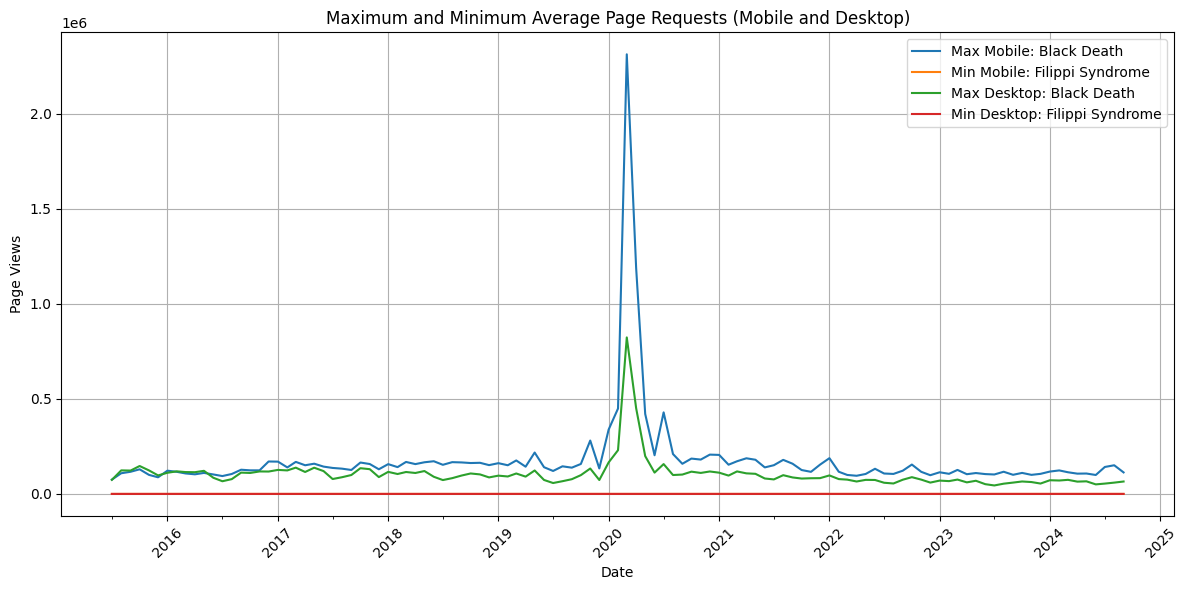

In [52]:
# Plot the First Graph
plt.figure(figsize=(12, 6))

# Plotting
plt.plot(max_mobile_series.index, max_mobile_series.values, label=f'Max Mobile: {max_mobile_article}')
plt.plot(min_mobile_series.index, min_mobile_series.values, label=f'Min Mobile: {min_mobile_article}')
plt.plot(max_desktop_series.index, max_desktop_series.values, label=f'Max Desktop: {max_desktop_article}')
plt.plot(min_desktop_series.index, min_desktop_series.values, label=f'Min Desktop: {min_desktop_article}')

# Formatting the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))  # Minor ticks every 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks to show only the year

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Maximum and Minimum Average Page Requests (Mobile and Desktop)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig('visualization_images/max_min_average_page_requests.png')
plt.show()


# Second Graph: Top 10 Peak Page Views

In [53]:
# Identify Top 10 Articles by Peak Views
# Find the peak views for each article
mobile_peak_views = mobile_pivot.max()
desktop_peak_views = desktop_pivot.max()

# Get the top 10 articles
top10_mobile_articles = mobile_peak_views.nlargest(10).index
top10_desktop_articles = desktop_peak_views.nlargest(10).index

In [54]:
# Extract Time Series Data for These Articles
# Mobile
top10_mobile_data = mobile_pivot[top10_mobile_articles]

# Desktop
top10_desktop_data = desktop_pivot[top10_desktop_articles]

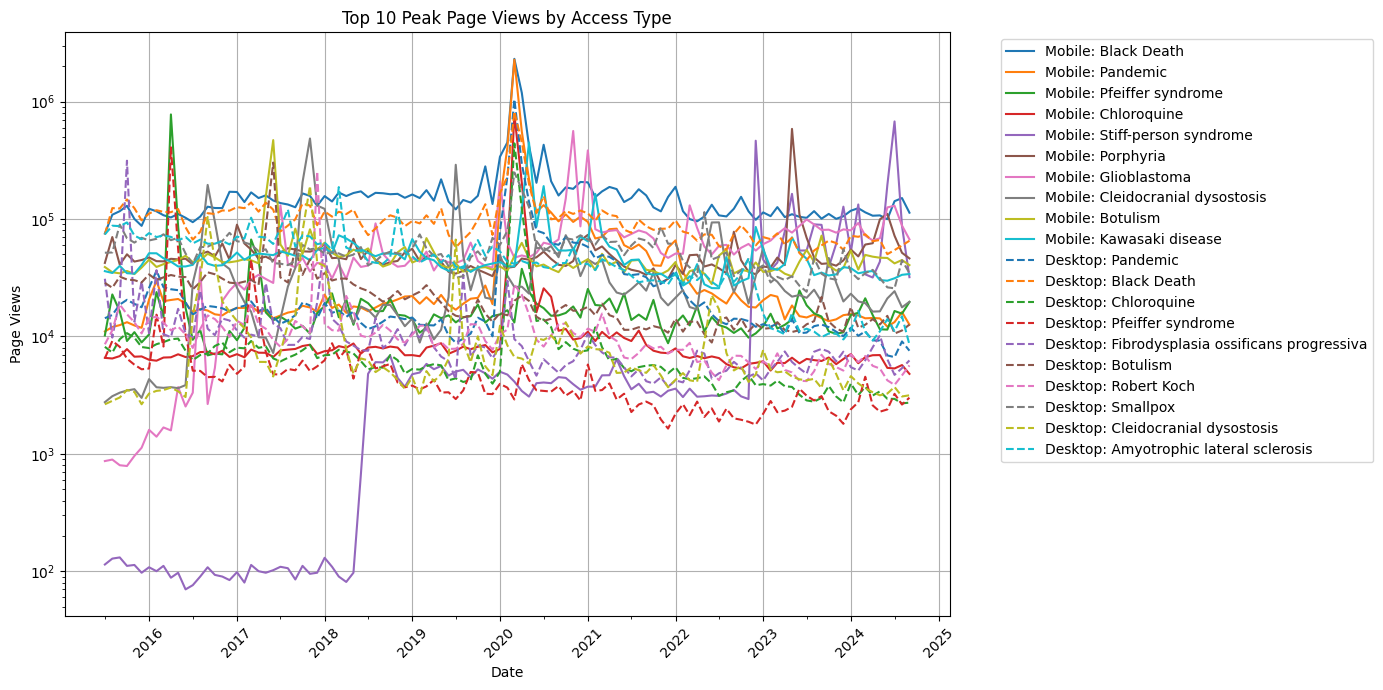

In [55]:
# Plot the Second Graph
plt.figure(figsize=(14, 7))

# Plotting Mobile Data
for article in top10_mobile_articles:
    plt.plot(top10_mobile_data.index, top10_mobile_data[article], label=f'Mobile: {article}')

# Plotting Desktop Data
for article in top10_desktop_articles:
    plt.plot(top10_desktop_data.index, top10_desktop_data[article], linestyle='--', label=f'Desktop: {article}')

# Formatting the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Top 10 Peak Page Views by Access Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.yscale('log')

# Save and show the plot
plt.savefig('visualization_images/top10_peak_page_views.png')
plt.show()

# Third Graph: Fewest Months of Data

In [56]:
# Count the number of months with non-zero data
mobile_months_with_data = (mobile_pivot > 0).sum()
desktop_months_with_data = (desktop_pivot > 0).sum()

In [57]:
# Get the articles with the fewest months of data
fewest_mobile_articles = mobile_months_with_data.nsmallest(10).index
fewest_desktop_articles = desktop_months_with_data.nsmallest(10).index

In [58]:
# Extract Time Series Data for These Articles
# Mobile
fewest_mobile_data = mobile_pivot[fewest_mobile_articles]

# Desktop
fewest_desktop_data = desktop_pivot[fewest_desktop_articles]

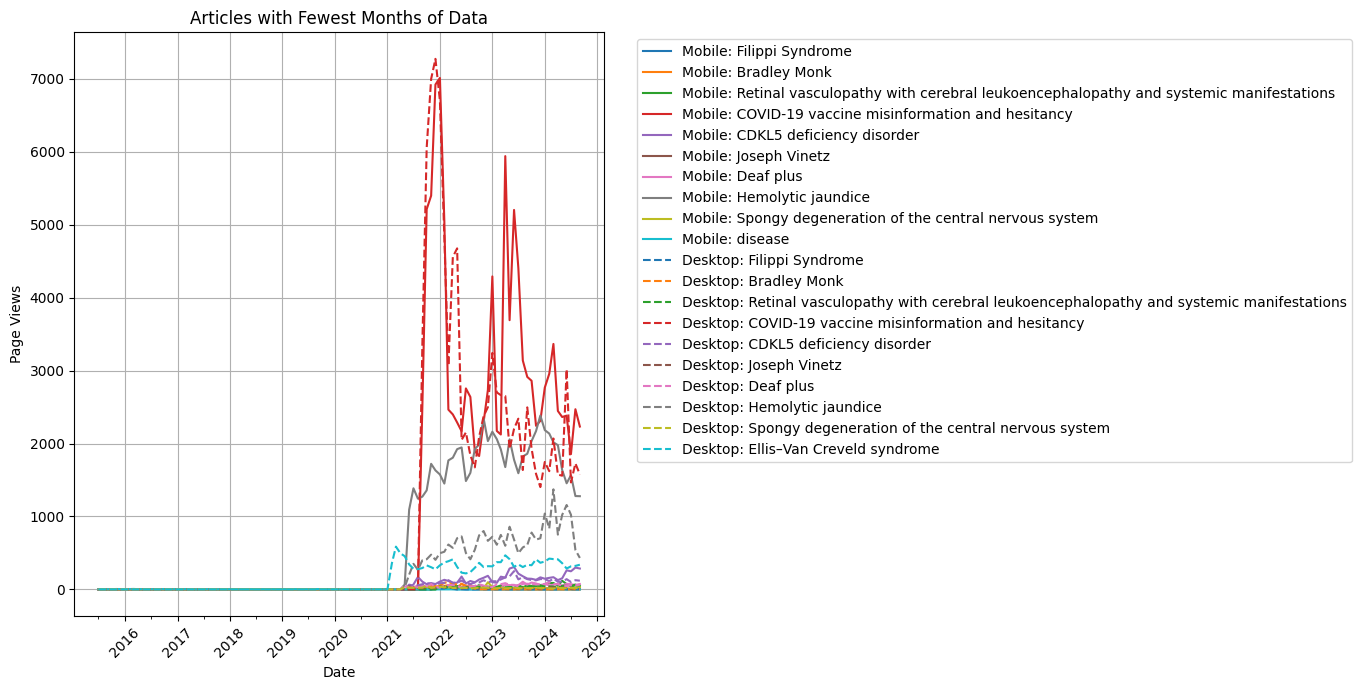

In [59]:
plt.figure(figsize=(14, 7))

# Plotting Mobile Data
for article in fewest_mobile_articles:
    plt.plot(fewest_mobile_data.index, fewest_mobile_data[article], label=f'Mobile: {article}')

# Plotting Desktop Data
for article in fewest_desktop_articles:
    plt.plot(fewest_desktop_data.index, fewest_desktop_data[article], linestyle='--', label=f'Desktop: {article}')

# Formatting the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Articles with Fewest Months of Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig('visualization_images/fewest_months_of_data.png')
plt.show()
